In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [22]:
directory = "PlayersData/Gks/"
files = os.listdir("PlayersData/Gks")
files

['Player stats A. Grashoff.xlsx',
 'Player stats A. Naylor.xlsx',
 'Player stats A. Schuck.xlsx',
 'Player stats B. Barretto.xlsx',
 'Player stats B. Chirpich.xlsx',
 'Player stats C. Goldstein.xlsx',
 'Player stats G. Fronk.xlsx',
 'Player stats H. Hercik.xlsx',
 'Player stats K. Anaya.xlsx',
 'Player stats K. Justin.xlsx',
 'Player stats M. Buckley.xlsx',
 'Player stats M. Ranson.xlsx',
 'Player stats M. Samuel.xlsx',
 'Player stats N. Dobler.xlsx',
 'Player stats R. Liebsack.xlsx',
 'Player stats R. Wilkerson.xlsx',
 'Player stats S. Hinz.xlsx']

In [51]:
merged = pd.read_excel(directory+files[0])
merged = merged.assign(Player = " ".join(files[0].split(" ")[2:]).replace(".xlsx",""),inplace = True)
for file in files:
    df = pd.read_excel(directory+file)
    df = df.assign(Player = " ".join(file.split(" ")[2:]).replace(".xlsx",""),inplace = True)
    merged = pd.merge(merged,df,how="outer")
merged = merged.assign(Season = merged.get("Date").apply(lambda date: int(date.split("-")[0])))
merged = merged[merged.get("Season")==2024]
merged.insert(5, "xCG-CG",merged.get("xCG")-merged.get("Conceded goals"))
merged = merged.sort_values("Date",ascending=False)
seasonAverages = merged.drop(["Match","Competition","Date"],axis = 1).groupby("Player").mean()

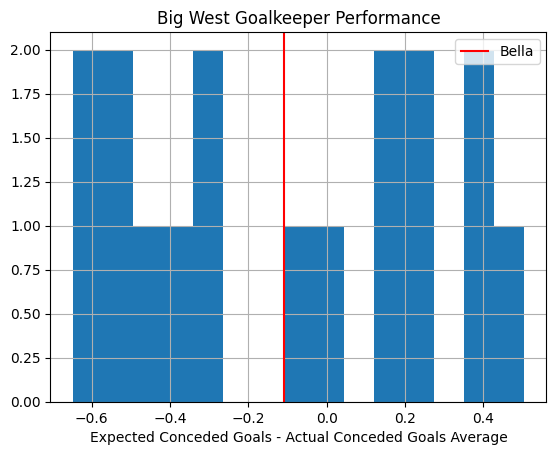

In [57]:
seasonAverages.get("xCG-CG").hist(bins=15)
plt.xlabel("Expected Conceded Goals - Actual Conceded Goals Average")
plt.title("Big West Goalkeeper Performance")
bella = seasonAverages.loc["B. Barretto"].get("xCG-CG")
ginny = seasonAverages.loc["G. Fronk"].get("xCG-CG")
plt.axvline(bella,color = "red",label = "Bella")
#plt.axvline(ginny,color = "green",label = "Ginny")
plt.legend()

Text(0.5, 0, 'Expected Conceded Goals - Actual Conceded Goals')

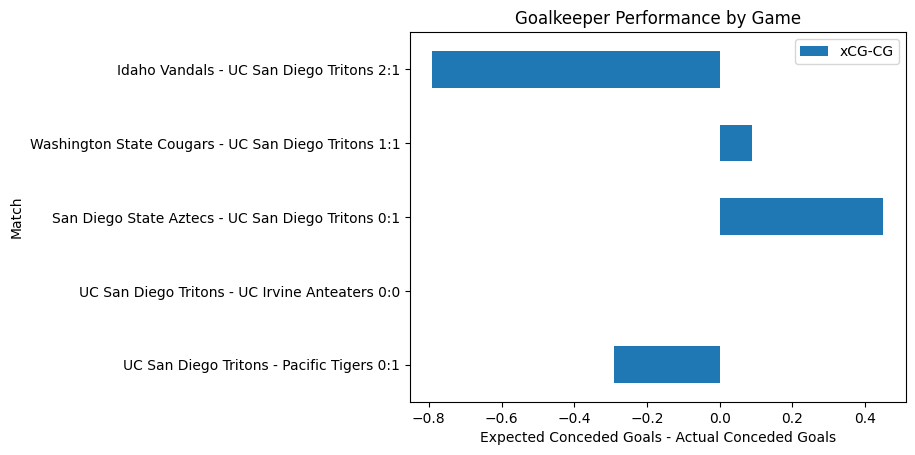

In [55]:
merged[merged.get("Player")=="B. Barretto"].get(["Match","xCG-CG"]).plot(kind = 'barh',x="Match")
plt.title("Goalkeeper Performance by Game")
plt.xlabel("Expected Conceded Goals - Actual Conceded Goals")

In [50]:
merged[merged.get("Player")=="B. Barretto"]

,Match,Competition,Date,Conceded goals,xCG,xCG-CG,Player,inplace,Season
89,Idaho Vandals - UC San Diego Tritons 2:1,United States. NCAA D1 Non-conference matches (W),2024-09-06,1,0.21,-0.79,B. Barretto,True,2024
115,San Diego State Aztecs - UC San Diego Tritons 0:1,United States. NCAA D1 Non-conference matches (W),2024-09-13,0,0.45,0.45,B. Barretto,True,2024
155,UC San Diego Tritons - Pacific Tigers 0:1,United States. NCAA D1 Non-conference matches (W),2024-09-22,1,0.71,-0.29,B. Barretto,True,2024
157,UC San Diego Tritons - UC Irvine Anteaters 0:0,United States. NCAA D1 Big West (W),2024-09-20,0,0.00,0.00,B. Barretto,True,2024
190,Washington State Cougars - UC San Diego Triton...,United States. NCAA D1 Non-conference matches (W),2024-09-08,1,1.09,0.09,B. Barretto,True,2024
